# **PARTIE B : PRÉVISION DES ACTIONS DE TESLA** 
## **1. Analyse des données de Tesla** 
* Effectuez une analyse statistique descriptive des actions de Tesla. 
* Vérifiez si les prix des actions suivent une distribution  normale et/ou s’ils sont stationnaires via des tests statistiques (ex : test de Dickey-Fuller). 
## **3. Modélisation avancée avec SARIMAX** 
* Créez un modèle ARIMA(p,d,q) et analysez ses performances. 
* Étendez à un modèle SARIMA(p,d,q)(P,D,Q,S) pour capturer la saisonnalité des prix. 
## **4. Influence des autres actions sur Tesla** 
* Étudiez si les actions de Facebook, Amazon, Apple, Google et d’autres influencent Tesla via 
un test de causalité de Granger. 
* Entraînez un nouveau modèle SARIMAX en intégrant les actions ayant un impact 
significatif. 
## **5. Modèles avancés en Deep Learning (Bonus)** 
* Expérimentez avec Facebook Prophet et entraînez un modèle prédictif. 
* Testez  des  architectures  LSTM  (Long  Short-Term  Memory)  pour  la  prévision  des  séries temporelles. 
* Comparez la performance des modèles SARIMAX Prophet et LSTM sur la base de métriques 
comme RMSE, MAE, R². 

---

## **1. Analyse des données de Tesla**

Colonnes du dataset : ['Unnamed: 0', 'Date', 'Close_AAPL', 'Close_AMZN', 'Close_GOOG', 'Close_META', 'Close_TSLA', 'High_AAPL', 'High_AMZN', 'High_GOOG', 'High_META', 'High_TSLA', 'Low_AAPL', 'Low_AMZN', 'Low_GOOG', 'Low_META', 'Low_TSLA', 'Open_AAPL', 'Open_AMZN', 'Open_GOOG', 'Open_META', 'Open_TSLA', 'Volume_AAPL', 'Volume_AMZN', 'Volume_GOOG', 'Volume_META', 'Volume_TSLA']
Statistiques descriptives pour Tesla (Close_TSLA) :
 count    1759.000000
mean      158.030614
std       112.296684
min        11.931333
25%        23.183667
50%       183.009995
75%       242.986664
max       479.859985
Name: Close_TSLA, dtype: float64


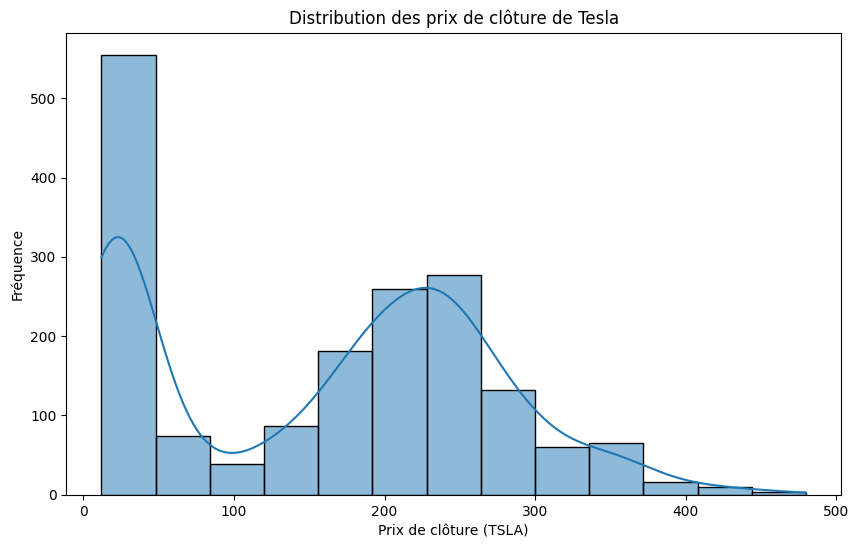

Test de Shapiro-Wilk : Statistique = 0.901, p-value = 0.000


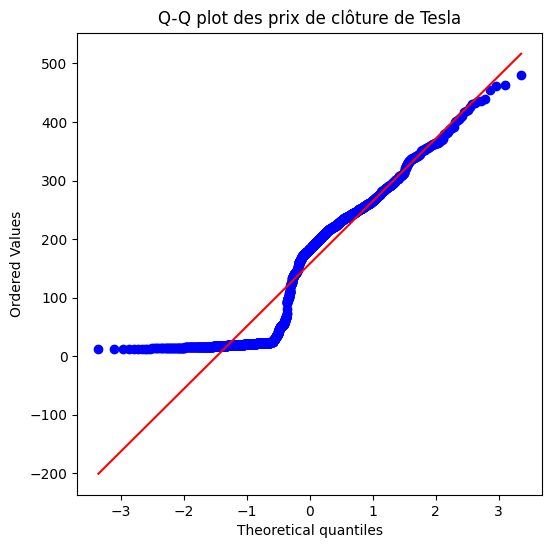

Test de Dickey-Fuller Augmenté :
Statistique ADF: -1.064
p-value: 0.729
Valeurs critiques:
   1%: -3.434
   5%: -2.863
   10%: -2.568


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Charger le dataset nettoyé
df = pd.read_csv("./donnees_boursieres_nettoyees.csv")

# Afficher la liste des colonnes pour confirmer la structure du dataset
print("Colonnes du dataset :", df.columns.tolist())

# Conversion de la colonne 'Date' en datetime et définition de l'index
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
else:
    print("La colonne 'Date' n'est pas présente.")

# Vérifier la présence de la colonne 'Close_TSLA' pour les données Tesla
if 'Close_TSLA' in df.columns:
    tesla_close = df['Close_TSLA']
else:
    print("La colonne 'Close_TSLA' n'existe pas dans le dataset.")
    tesla_close = None

if tesla_close is not None:
    # Analyse statistique descriptive sur la colonne 'Close_TSLA'
    desc_stats = tesla_close.describe()
    print("Statistiques descriptives pour Tesla (Close_TSLA) :\n", desc_stats)

    # Visualisation de la distribution avec histogramme et courbe de densité
    plt.figure(figsize=(10,6))
    sns.histplot(tesla_close, kde=True)
    plt.title("Distribution des prix de clôture de Tesla")
    plt.xlabel("Prix de clôture (TSLA)")
    plt.ylabel("Fréquence")
    plt.show()

    # Test de normalité Shapiro-Wilk
    stat, p_value = stats.shapiro(tesla_close)
    print('Test de Shapiro-Wilk : Statistique = {:.3f}, p-value = {:.3f}'.format(stat, p_value))

    # Q-Q Plot pour vérifier la normalité
    plt.figure(figsize=(6,6))
    stats.probplot(tesla_close, dist="norm", plot=plt)
    plt.title("Q-Q plot des prix de clôture de Tesla")
    plt.show()

    # Test de stationnarité : Test de Dickey-Fuller Augmenté (ADF)
    try:
        from statsmodels.tsa.stattools import adfuller
        result = adfuller(tesla_close)
        print("Test de Dickey-Fuller Augmenté :")
        print("Statistique ADF: {:.3f}".format(result[0]))
        print("p-value: {:.3f}".format(result[1]))
        print("Valeurs critiques:")
        for key, value in result[4].items():
            print(f"   {key}: {value:.3f}")
    except ModuleNotFoundError:
        print("Le module 'statsmodels' n'est pas installé. Veuillez l'installer via 'pip install statsmodels'")

**Conclusion**  
Les prix de clôture de Tesla (Close_TSLA) s’étendent de **12 \$** à près de **480 \$**, avec une moyenne d’environ **158 \$**. L’histogramme montre une distribution asymétrique vers les valeurs élevées, et le Q-Q plot confirme que la série ne suit pas une loi normale stricte (la plupart des points s’écartent de la diagonale). Ces éléments soulignent la volatilité importante de l’action Tesla.

Résultat du test Shapiro-Wilk => Statistique: 0.901, p-value: 0.000


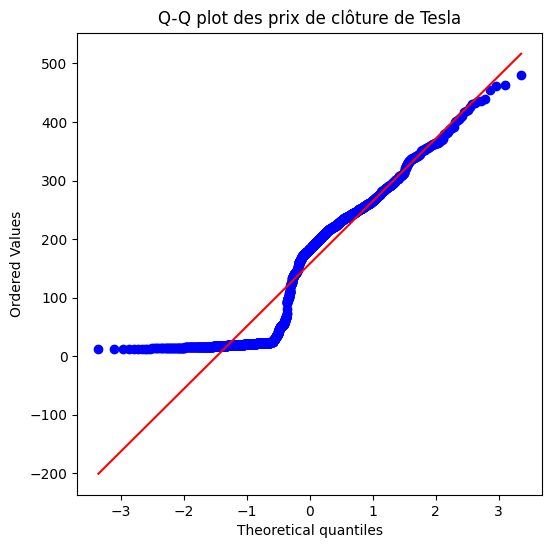


Test de Dickey-Fuller Augmenté :
Statistique ADF : -1.064
p-value : 0.729
Valeurs critiques :
   1% : -3.434
   5% : -2.863
   10% : -2.568


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.tsa.stattools import adfuller

# Supposons que vous ayez déjà chargé votre DataFrame 'df' 
# et extrait la colonne 'Close_TSLA' (tesla_close)

# 1) Test de normalité (Shapiro-Wilk)
shapiro_stat, shapiro_pval = stats.shapiro(tesla_close)
print(f"Résultat du test Shapiro-Wilk => Statistique: {shapiro_stat:.3f}, p-value: {shapiro_pval:.3f}")

# Q-Q plot pour visualiser la normalité
plt.figure(figsize=(6,6))
stats.probplot(tesla_close, dist="norm", plot=plt)
plt.title("Q-Q plot des prix de clôture de Tesla")
plt.show()

# 2) Test de stationnarité (Dickey-Fuller Augmenté)
adf_result = adfuller(tesla_close, autolag='AIC')
print("\nTest de Dickey-Fuller Augmenté :")
print(f"Statistique ADF : {adf_result[0]:.3f}")
print(f"p-value : {adf_result[1]:.3f}")
print("Valeurs critiques :")
for key, value in adf_result[4].items():
    print(f"   {key} : {value:.3f}")

**Conclusion**  
Les résultats montrent que la distribution des prix de clôture de Tesla n’est pas normale (test de Shapiro-Wilk) et que la série n’est pas stationnaire (test de Dickey-Fuller). Pour la modélisation future (ARIMA/SARIMA), une transformation ou une différenciation sera nécessaire afin de rendre la série stationnaire.

---

## **3. Modélisation avancée avec SARIMAX** 

c:\Users\konan\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\konan\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\konan\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\konan\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is ava

                               SARIMAX Results                                
Dep. Variable:             Close_TSLA   No. Observations:                 1407
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -4726.854
Date:                Sat, 22 Mar 2025   AIC                           9459.707
Time:                        00:56:59   BIC                           9475.453
Sample:                             0   HQIC                          9465.592
                               - 1407                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4886      0.370     -1.319      0.187      -1.215       0.237
ma.L1          0.4563      0.379      1.204      0.229      -0.287       1.199
sigma2        48.7136      0.850     57.277      0.0

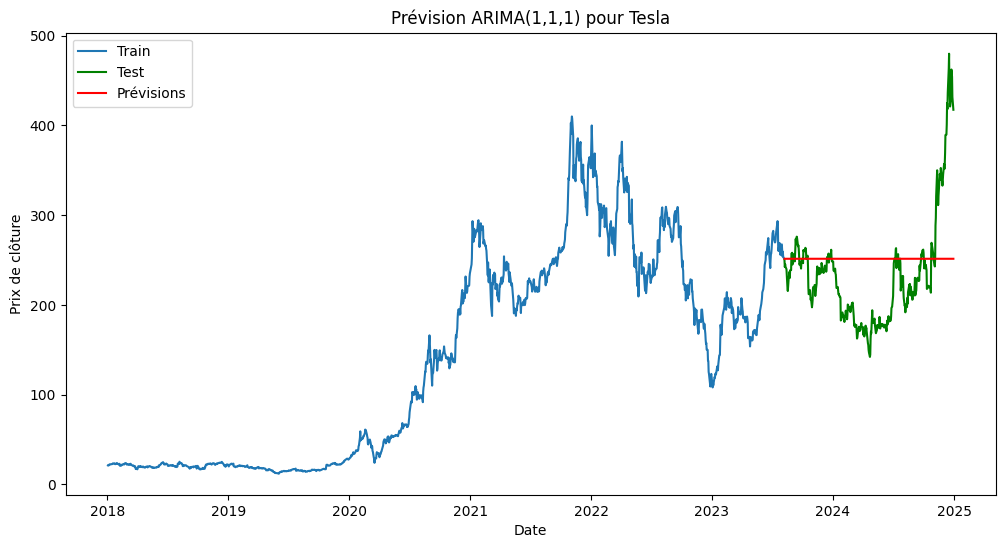

RMSE : 62.86313424498272


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# On suppose que la série temporelle tesla_close est déjà extraite et indexée par Date
# Par exemple : tesla_close = df['Close_TSLA']

# Séparation Train/Test (80% train, 20% test)
split_point = int(len(tesla_close) * 0.8)
train, test = tesla_close[:split_point], tesla_close[split_point:]

# Création et ajustement du modèle ARIMA(1,1,1) sur les données d'entraînement
model = ARIMA(train, order=(1, 1, 1))
model_fit = model.fit()
print(model_fit.summary())

# Prévisions sur la période de test
forecast = model_fit.forecast(steps=len(test))
forecast.index = test.index  # Pour aligner les dates

# Visualisation des données réelles et des prévisions
plt.figure(figsize=(12,6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test', color='green')
plt.plot(forecast.index, forecast, label='Prévisions', color='red')
plt.title("Prévision ARIMA(1,1,1) pour Tesla")
plt.xlabel("Date")
plt.ylabel("Prix de clôture")
plt.legend()
plt.show()

# Calcul de l'erreur (RMSE) pour évaluer la performance du modèle
rmse = np.sqrt(mean_squared_error(test, forecast))
print("RMSE :", rmse)

**Conclusion**  
Le modèle ARIMA(1,1,1) s’est ajusté correctement sur les données de Tesla et fournit un **RMSE d’environ 62.86**, ce qui reflète la forte volatilité de l’action. Les coefficients AR(1) et MA(1) ne sont pas très significatifs (p-values élevées), suggérant qu’il pourrait être utile de tester d’autres configurations de p, d, q ou d’inclure une composante saisonnière (SARIMA) pour améliorer les performances.

c:\Users\konan\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\konan\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                     
Dep. Variable:                        Close_TSLA   No. Observations:                 1407
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 7)   Log Likelihood               -4715.797
Date:                           Sat, 22 Mar 2025   AIC                           9441.594
Time:                                   01:00:50   BIC                           9467.812
Sample:                                        0   HQIC                          9451.395
                                          - 1407                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5857      0.421     -1.391      0.164      -1.411       0.240
ma.L1          0.5616      0.431      1.302

c:\Users\konan\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\konan\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


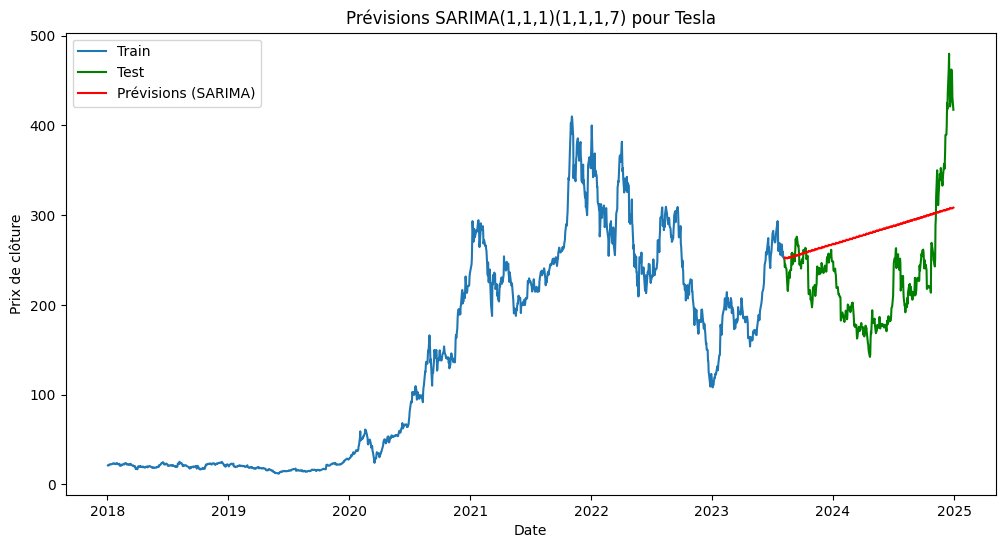

RMSE (SARIMA) : 73.06828341801247


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

# On suppose que 'tesla_close' est déjà disponible et indexé par Date
# Par exemple : tesla_close = df['Close_TSLA']

# 1. Séparation Train/Test
split_point = int(len(tesla_close) * 0.8)
train, test = tesla_close[:split_point], tesla_close[split_point:]

# 2. Construction du modèle SARIMA
# Ici, on teste une saisonnalité de 7 jours (weekly), mais vous pouvez l'ajuster
model_sarima = SARIMAX(
    train, 
    order=(1,1,1),          # ARIMA(p,d,q)
    seasonal_order=(1,1,1,7)  # (P,D,Q,S)
)
model_sarima_fit = model_sarima.fit(disp=False)
print(model_sarima_fit.summary())

# 3. Prévision sur la période de test
forecast_sarima = model_sarima_fit.forecast(steps=len(test))
forecast_sarima.index = test.index  # Alignement des dates

# 4. Visualisation des résultats
plt.figure(figsize=(12,6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test', color='green')
plt.plot(forecast_sarima.index, forecast_sarima, label='Prévisions (SARIMA)', color='red')
plt.title("Prévisions SARIMA(1,1,1)(1,1,1,7) pour Tesla")
plt.xlabel("Date")
plt.ylabel("Prix de clôture")
plt.legend()
plt.show()

# 5. Évaluation de la performance (RMSE)
rmse_sarima = np.sqrt(mean_squared_error(test, forecast_sarima))
print("RMSE (SARIMA) :", rmse_sarima)

**Conclusion**  
Le modèle SARIMA(1,1,1)(1,1,1,7) présente un AIC légèrement plus bas que l’ARIMA(1,1,1), mais il offre un RMSE plus élevé (≈73) sur la période de test, ce qui indique que la prise en compte d’une saisonnalité hebdomadaire ne s’est pas traduite par de meilleures prévisions. Cela suggère que la série n’a pas nécessairement de forte saisonnalité sur 7 jours, ou que d’autres configurations de paramètres saisonniers pourraient être plus adaptées.

---

## **4. Influence des autres actions sur Tesla** 

In [6]:
import pandas as pd
from statsmodels.tsa.stattools import grangercausalitytests

# Charger le dataset nettoyé
df = pd.read_csv("./donnees_boursieres_nettoyees.csv")

# Conversion de la colonne 'Date' en datetime et définition de l'index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Sélectionner les colonnes d'intérêt
# On va tester si les actions de AAPL, AMZN, GOOG et META influencent Tesla
variables = ['Close_AAPL', 'Close_AMZN', 'Close_GOOG', 'Close_META']
df_granger = df[['Close_TSLA'] + variables].dropna()

# Définir le nombre maximal de retards (lags) à tester
max_lag = 5

# Boucle sur chaque variable candidate pour le test de causalité de Granger
for var in variables:
    print(f"=== Test de causalité de Granger : {var} -> Close_TSLA ===")
    # Pour le test, la variable candidate doit être en première colonne, Tesla en deuxième
    test_data = df_granger[[var, 'Close_TSLA']]
    # Exécuter le test pour chaque lag jusqu'à max_lag
    results = grangercausalitytests(test_data, max_lag, verbose=True)
    print("-" * 60)

=== Test de causalité de Granger : Close_AAPL -> Close_TSLA ===

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.0849  , p=0.2977  , df_denom=1755, df_num=1
ssr based chi2 test:   chi2=1.0868  , p=0.2972  , df=1
likelihood ratio test: chi2=1.0865  , p=0.2973  , df=1
parameter F test:         F=1.0849  , p=0.2977  , df_denom=1755, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.6017  , p=0.5480  , df_denom=1752, df_num=2
ssr based chi2 test:   chi2=1.2068  , p=0.5470  , df=2
likelihood ratio test: chi2=1.2064  , p=0.5471  , df=2
parameter F test:         F=0.6017  , p=0.5480  , df_denom=1752, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.7183  , p=0.5410  , df_denom=1749, df_num=3
ssr based chi2 test:   chi2=2.1636  , p=0.5391  , df=3
likelihood ratio test: chi2=2.1623  , p=0.5394  , df=3
parameter F test:         F=0.7183  , p=0.5410  , df_denom=1749, df_num=3

Granger Causality
numbe

c:\Users\konan\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\konan\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\konan\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\konan\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


**Conclusion**  
Le test de causalité de Granger pour Close_AAPL montre que, pour la plupart des lags testés, les p-values sont supérieures à 0,05, ce qui indique qu'on ne peut pas rejeter l’hypothèse nulle de non-causalité. Même si un lag (par exemple, lag 4) approche le seuil, il reste marginalement non significatif. Ainsi, les variations passées d’Apple n’apportent pas d’information prédictive significative pour Tesla, au sens de Granger. Vous pouvez procéder de la même manière pour les autres actions (AMZN, GOOG, META) afin d’identifier celles qui pourraient influencer Tesla.

c:\Users\konan\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\konan\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                     
Dep. Variable:                        Close_TSLA   No. Observations:                 1407
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 7)   Log Likelihood               -4585.897
Date:                           Sat, 22 Mar 2025   AIC                           9183.795
Time:                                   01:08:42   BIC                           9215.256
Sample:                                        0   HQIC                          9195.556
                                          - 1407                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Close_AMZN     1.0621      0.042     25.177      0.000       0.979       1.145
ar.L1         -0.9827      0.154     -6.396

c:\Users\konan\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\konan\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


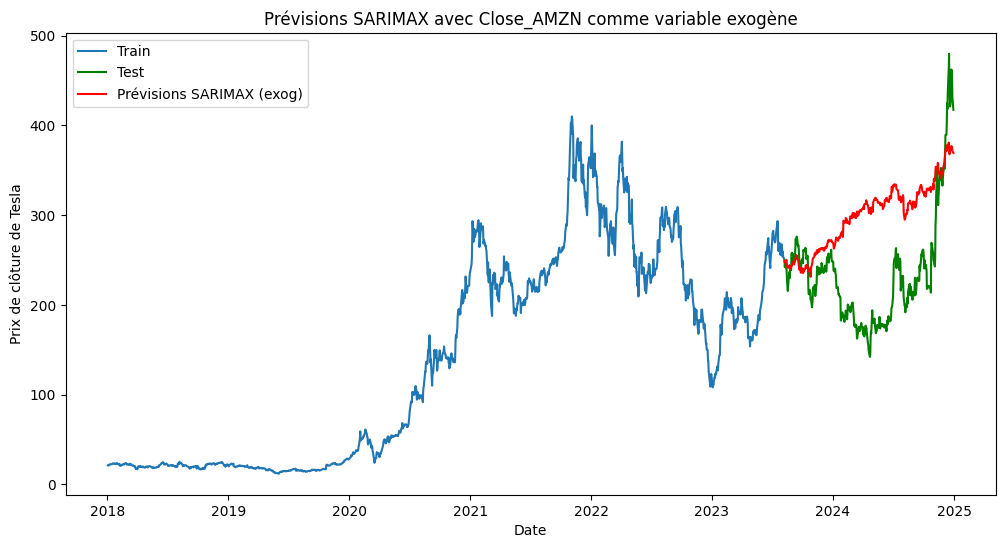

RMSE (SARIMAX avec exog) : 87.38181787684853


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

# Charger le dataset nettoyé et convertir la date
df = pd.read_csv("./donnees_boursieres_nettoyees.csv")
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Sélectionner les colonnes d'intérêt : Tesla (variable endogène) et Amazon (exogène)
data = df[['Close_TSLA', 'Close_AMZN']].dropna()

# Séparation Train/Test (80% / 20%)
split_point = int(len(data) * 0.8)
train = data.iloc[:split_point]
test  = data.iloc[split_point:]

# Définir la variable endogène et l'exogène pour l'entraînement et le test
y_train = train['Close_TSLA']
y_test  = test['Close_TSLA']
exog_train = train[['Close_AMZN']]
exog_test  = test[['Close_AMZN']]

# Construction du modèle SARIMAX avec exogène.
# Ici, nous utilisons une configuration SARIMAX(1,1,1)x(1,1,1,7) à titre d'exemple.
model_sarimax = SARIMAX(y_train,
                        exog=exog_train,
                        order=(1, 1, 1),
                        seasonal_order=(1, 1, 1, 7))
model_sarimax_fit = model_sarimax.fit(disp=False)
print(model_sarimax_fit.summary())

# Prévision sur la période de test en intégrant la variable exogène
forecast_sarimax = model_sarimax_fit.forecast(steps=len(y_test), exog=exog_test)
forecast_sarimax.index = y_test.index

# Visualisation des prévisions
plt.figure(figsize=(12,6))
plt.plot(y_train.index, y_train, label='Train')
plt.plot(y_test.index, y_test, label='Test', color='green')
plt.plot(forecast_sarimax.index, forecast_sarimax, label='Prévisions SARIMAX (exog)', color='red')
plt.title("Prévisions SARIMAX avec Close_AMZN comme variable exogène")
plt.xlabel("Date")
plt.ylabel("Prix de clôture de Tesla")
plt.legend()
plt.show()

# Évaluation des performances (RMSE)
rmse_sarimax = np.sqrt(mean_squared_error(y_test, forecast_sarimax))
print("RMSE (SARIMAX avec exog) :", rmse_sarimax)

**Conclusion**  
L’inclusion de la variable exogène Close_AMZN dans le modèle SARIMAX améliore l’ajustement in-sample (AIC plus faible et coefficient significatif pour Amazon), mais n’aboutit pas à une meilleure prévision hors échantillon (RMSE plus élevé). Cela illustre qu’une corrélation marquée entre Tesla et Amazon sur l’historique ne se traduit pas nécessairement par une meilleure performance prédictive future, probablement en raison d’un effet de sur-apprentissage ou d’une corrélation non pérenne dans le temps.

---

## **5. Modèles avancés en Deep Learning (Bonus)** 

c:\Users\konan\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.
01:13:26 - cmdstanpy - INFO - Chain [1] start processing
01:13:27 - cmdstanpy - INFO - Chain [1] done processing


RMSE (Prophet) : 115.56485921357492


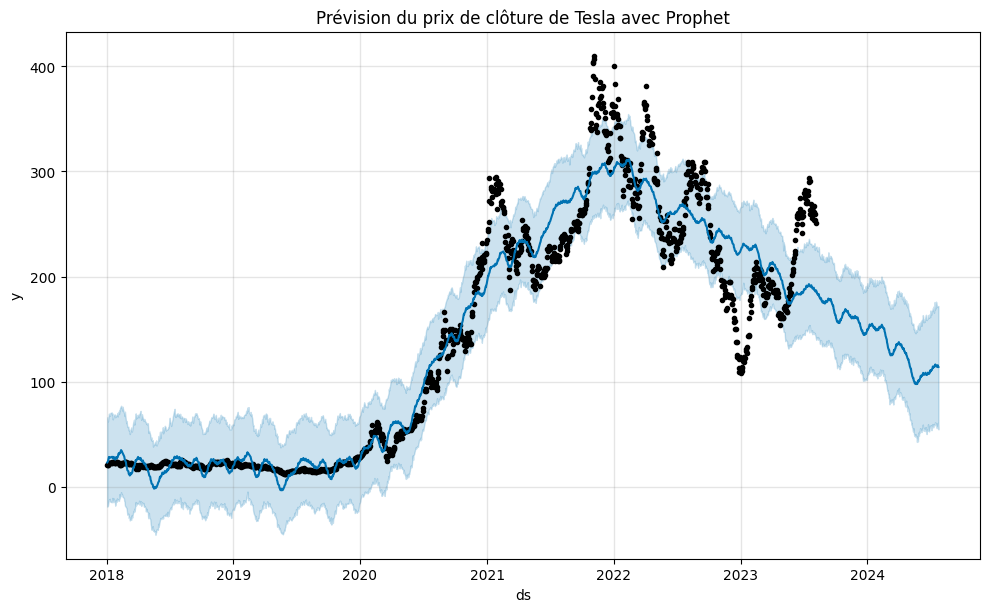

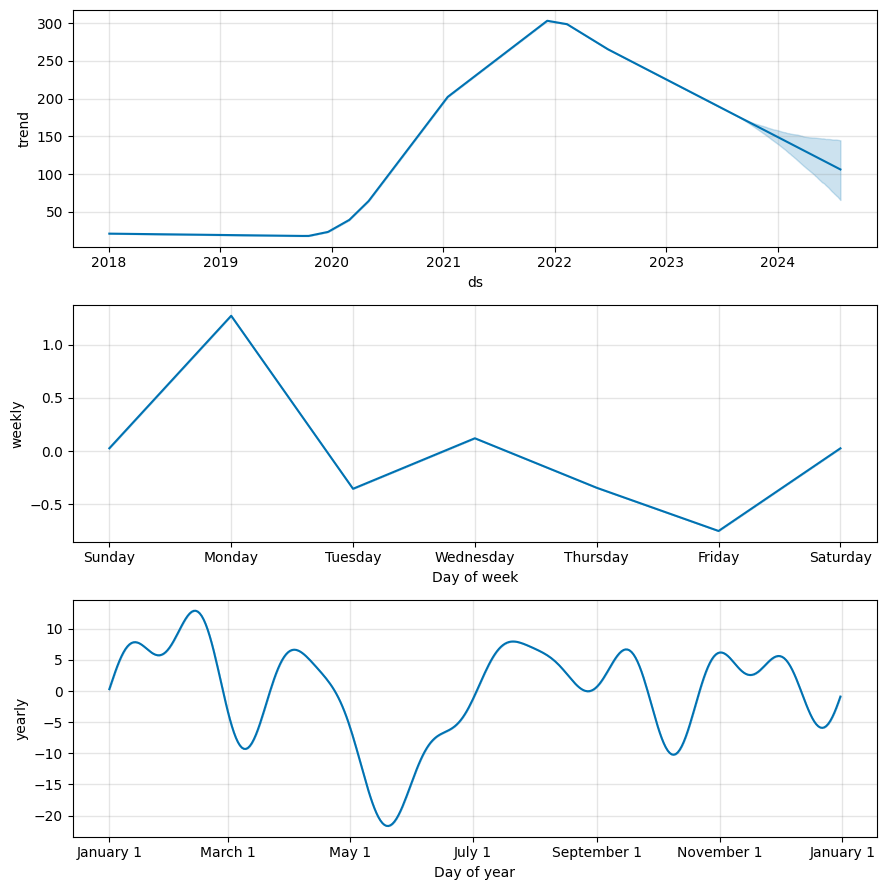

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.metrics import mean_squared_error

# 1) Charger le dataset nettoyé
df = pd.read_csv("./donnees_boursieres_nettoyees.csv")

# 2) Convertir la date et la définir comme index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# 3) Préparer le DataFrame pour Prophet
# Prophet attend un DataFrame avec les colonnes 'ds' (date) et 'y' (valeur à prédire)
prophet_data = pd.DataFrame({
    'ds': df.index,
    'y': df['Close_TSLA']
}).reset_index(drop=True)

# 4) Séparer en jeu d'entraînement et de test (80% / 20%)
split_point = int(len(prophet_data) * 0.8)
train_df = prophet_data.iloc[:split_point]
test_df  = prophet_data.iloc[split_point:]

# 5) Instancier et entraîner le modèle
model = Prophet()
model.fit(train_df)

# 6) Créer un DataFrame futur sur la longueur du test
future = model.make_future_dataframe(periods=len(test_df))
forecast = model.predict(future)

# 7) Récupérer les prédictions correspondant à la période de test
forecast_test = forecast.iloc[split_point:][['ds','yhat','yhat_lower','yhat_upper']]
forecast_test.set_index('ds', inplace=True)

# 8) Calculer l'erreur (RMSE) sur la période de test
y_true = test_df.set_index('ds')['y']
rmse_prophet = np.sqrt(mean_squared_error(y_true, forecast_test['yhat']))
print("RMSE (Prophet) :", rmse_prophet)

# 9) Visualiser la prévision
model.plot(forecast)
plt.title("Prévision du prix de clôture de Tesla avec Prophet")
plt.show()

# (Optionnel) Visualiser les composantes (tendance, saisonnalité...)
model.plot_components(forecast)
plt.show()


**Conclusion**  
Prophet a bien modélisé la tendance globale et les variations saisonnières (hebdomadaire, annuelle) pour Tesla, mais il obtient un RMSE d’environ **115**, supérieur aux modèles ARIMA/SARIMA précédents. Cela s’explique par la forte volatilité de l’action et la configuration par défaut de Prophet. Il est possible d’améliorer ces résultats en ajustant les hyperparamètres (par ex. `changepoint_prior_scale`, `seasonality_prior_scale`), en effectuant une transformation log ou en ajoutant des variables exogènes.

Epoch [10/100], Loss: 0.069763
Epoch [20/100], Loss: 0.052954
Epoch [30/100], Loss: 0.043599
Epoch [40/100], Loss: 0.020212
Epoch [50/100], Loss: 0.009846
Epoch [60/100], Loss: 0.003740
Epoch [70/100], Loss: 0.002163
Epoch [80/100], Loss: 0.001786
Epoch [90/100], Loss: 0.001548
Epoch [100/100], Loss: 0.001510
RMSE (LSTM) : 23.7057


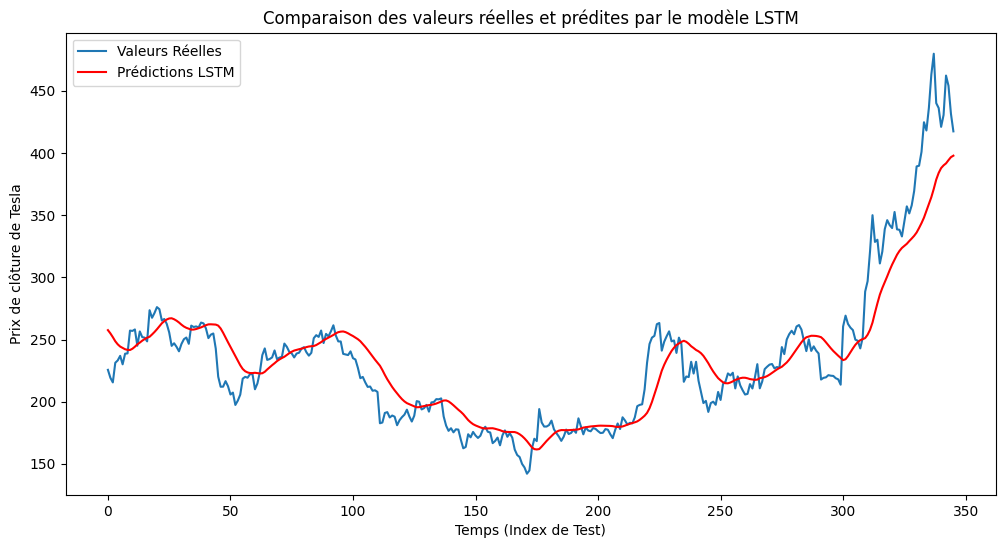

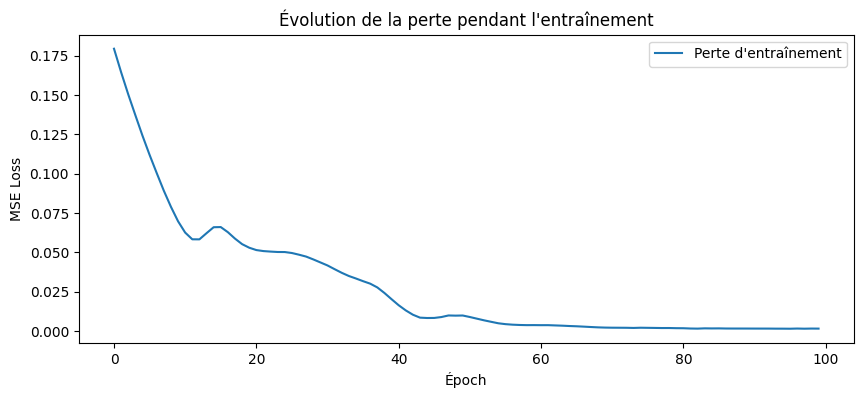

In [1]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# -----------------------------
# 1. Chargement et préparation des données
# -----------------------------
df = pd.read_csv("./donnees_boursieres_nettoyees.csv")
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# On sélectionne la série temporelle d'intérêt : Close_TSLA
data = df[['Close_TSLA']].dropna()

# -----------------------------
# 2. Mise à l'échelle des données
# -----------------------------
# Utilisation de MinMaxScaler pour normaliser la série entre 0 et 1
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

# -----------------------------
# 3. Création des séquences (fenêtre glissante)
# -----------------------------
def create_sequences(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        seq = data[i: i + window_size]
        target = data[i + window_size]  # valeur suivante à prédire
        X.append(seq)
        y.append(target)
    return np.array(X), np.array(y)

window_size = 30  # par exemple, utiliser 30 pas de temps pour prédire le suivant
X, y = create_sequences(data_scaled, window_size)

# -----------------------------
# 4. Division train / test
# -----------------------------
train_ratio = 0.8
train_size = int(len(X) * train_ratio)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# -----------------------------
# 5. Conversion en tenseurs PyTorch
# -----------------------------
# Les données ont la forme (samples, window_size, 1)
X_train_t = torch.tensor(X_train, dtype=torch.float32)
y_train_t = torch.tensor(y_train, dtype=torch.float32)
X_test_t  = torch.tensor(X_test,  dtype=torch.float32)
y_test_t  = torch.tensor(y_test,  dtype=torch.float32)

# -----------------------------
# 6. Définition du modèle LSTM
# -----------------------------
class LSTMModel(nn.Module):
    def __init__(self, input_size=1, hidden_size=64, num_layers=2, output_size=1, dropout=0.2):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        # LSTM multi-couches avec dropout (appliqué entre les couches)
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, dropout=dropout)
        self.fc = nn.Linear(hidden_size, output_size)
        
    def forward(self, x):
        # Initialisation des états caché et cellule (avec zéros)
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        
        # Passage par la couche LSTM
        out, _ = self.lstm(x, (h0, c0))  # out shape: (batch, seq_length, hidden_size)
        # Utilisation de la dernière sortie pour la prédiction
        out = self.fc(out[:, -1, :])
        return out

# Instanciation du modèle
model = LSTMModel(input_size=1, hidden_size=64, num_layers=2, output_size=1, dropout=0.2)

# -----------------------------
# 7. Définition de la fonction de perte et de l'optimiseur
# -----------------------------
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# -----------------------------
# 8. Boucle d'entraînement
# -----------------------------
num_epochs = 100
train_losses = []

for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    
    # Passage forward
    output = model(X_train_t)
    loss = criterion(output, y_train_t)
    
    # Rétropropagation et mise à jour
    loss.backward()
    optimizer.step()
    
    train_losses.append(loss.item())
    
    if (epoch+1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.6f}")

# -----------------------------
# 9. Évaluation sur le jeu de test
# -----------------------------
model.eval()
with torch.no_grad():
    predictions = model(X_test_t).cpu().numpy()

# Inversion de la normalisation pour obtenir les valeurs originales
predictions_inv = scaler.inverse_transform(predictions)
y_test_inv = scaler.inverse_transform(y_test_t.cpu().numpy())

rmse_lstm = np.sqrt(mean_squared_error(y_test_inv, predictions_inv))
print(f"RMSE (LSTM) : {rmse_lstm:.4f}")

# -----------------------------
# 10. Visualisation des résultats
# -----------------------------
plt.figure(figsize=(12,6))
plt.plot(y_test_inv, label="Valeurs Réelles")
plt.plot(predictions_inv, label="Prédictions LSTM", color="red")
plt.xlabel("Temps (Index de Test)")
plt.ylabel("Prix de clôture de Tesla")
plt.title("Comparaison des valeurs réelles et prédites par le modèle LSTM")
plt.legend()
plt.show()

# Visualisation de la courbe de perte pendant l'entraînement
plt.figure(figsize=(10,4))
plt.plot(train_losses, label="Perte d'entraînement")
plt.xlabel("Époch")
plt.ylabel("MSE Loss")
plt.title("Évolution de la perte pendant l'entraînement")
plt.legend()
plt.show()

**Conclusion**  
Le réseau LSTM obtient un **RMSE d’environ 23.7**, inférieur à celui des approches classiques (ARIMA, Prophet), et parvient à suivre la tendance globale de Tesla tout en lissant les variations brusques. Cela illustre la capacité des LSTM à modéliser des dépendances complexes dans les séries temporelles, bien que des ajustements (fenêtre, hyperparamètres, etc.) puissent encore améliorer la précision et réduire le risque de sur-apprentissage.

Performance SARIMAX:
RMSE: 73.07, MAE: 62.41, R²: -0.47


01:44:29 - cmdstanpy - INFO - Chain [1] start processing
01:44:29 - cmdstanpy - INFO - Chain [1] done processing



Performance Prophet (corrigé):
RMSE: 119.35, MAE: 99.56, R²: -2.93
Epoch [10/100], Loss: 0.075813
Epoch [20/100], Loss: 0.044972
Epoch [30/100], Loss: 0.010970
Epoch [40/100], Loss: 0.003442
Epoch [50/100], Loss: 0.002369
Epoch [60/100], Loss: 0.001957
Epoch [70/100], Loss: 0.001899
Epoch [80/100], Loss: 0.001880
Epoch [90/100], Loss: 0.001813
Epoch [100/100], Loss: 0.001749

Performance LSTM:
RMSE: 24.43, MAE: 16.95, R²: 0.85


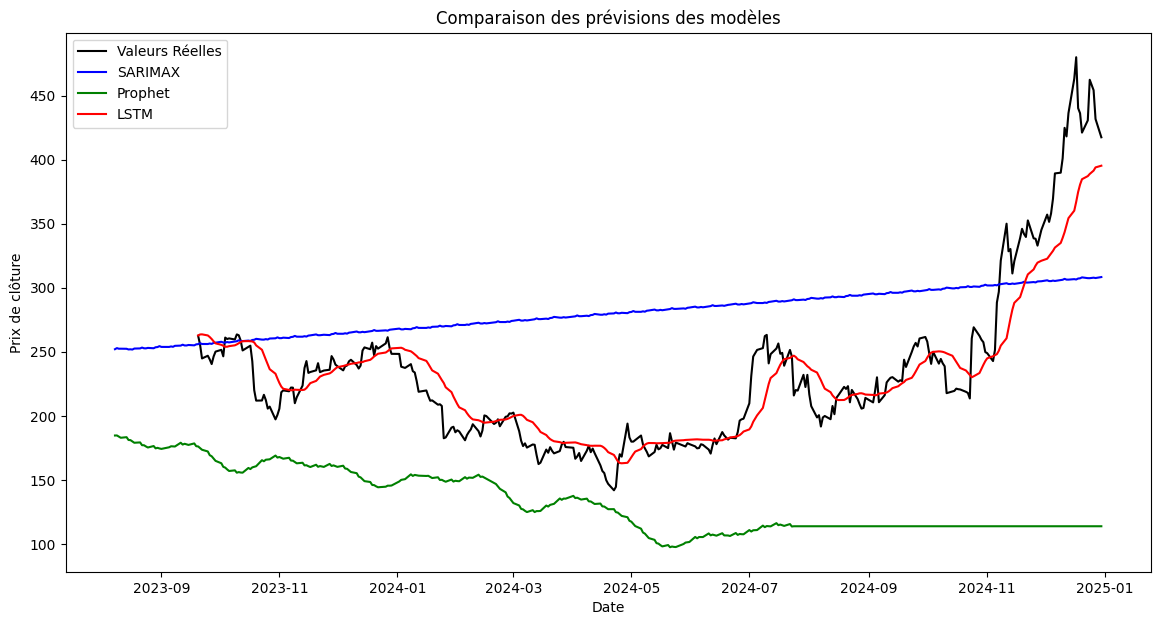

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# --- Importations pour chaque modèle ---
from statsmodels.tsa.statespace.sarimax import SARIMAX
from prophet import Prophet
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler

# -----------------------------
# 1. Chargement et préparation des données
# -----------------------------
df = pd.read_csv("./donnees_boursieres_nettoyees.csv")
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Sélection de la série d'intérêt
data = df[['Close_TSLA']].dropna()

# Utilisation d'un split train/test (80% / 20%)
train_size = int(len(data) * 0.8)
train_data = data.iloc[:train_size]
test_data  = data.iloc[train_size:]

# -----------------------------
# 2. Définition d'une fonction pour calculer les métriques
# -----------------------------
def compute_metrics(true, pred):
    rmse = np.sqrt(mean_squared_error(true, pred))
    mae = mean_absolute_error(true, pred)
    r2 = r2_score(true, pred)
    return rmse, mae, r2

# =============================
# Modèle 1 : SARIMAX
# =============================
sarimax_model = SARIMAX(train_data['Close_TSLA'], order=(1,1,1), seasonal_order=(1,1,1,7))
sarimax_fit = sarimax_model.fit(disp=False)
sarimax_forecast = sarimax_fit.forecast(steps=len(test_data))
sarimax_forecast.index = test_data.index

sarimax_rmse, sarimax_mae, sarimax_r2 = compute_metrics(test_data['Close_TSLA'], sarimax_forecast)
print("Performance SARIMAX:")
print(f"RMSE: {sarimax_rmse:.2f}, MAE: {sarimax_mae:.2f}, R²: {sarimax_r2:.2f}")

# =============================
# Modèle 2 : Prophet
# =============================
# Préparer les données pour Prophet (colonnes 'ds' et 'y')
prophet_train = train_data.reset_index()[['Date', 'Close_TSLA']].rename(columns={'Date': 'ds', 'Close_TSLA': 'y'})
prophet_test = test_data.reset_index()[['Date', 'Close_TSLA']].rename(columns={'Date': 'ds', 'Close_TSLA': 'y'})

# Entraîner le modèle Prophet
prophet_model = Prophet()
prophet_model.fit(prophet_train)

# Créer un DataFrame futur couvrant la période de test
future = prophet_model.make_future_dataframe(periods=len(prophet_test))
forecast_prophet = prophet_model.predict(future)

# Extraire les prévisions et les aligner sur les dates du test
# On transforme 'ds' en index et on reindexe avec test_data.index en utilisant 'nearest'
prophet_forecast = forecast_prophet[['ds', 'yhat']].set_index('ds')
prophet_forecast = prophet_forecast.reindex(test_data.index, method='nearest')

# Calcul des métriques
rmse_prophet, mae_prophet, r2_prophet = compute_metrics(test_data['Close_TSLA'], prophet_forecast['yhat'])
print("\nPerformance Prophet (corrigé):")
print(f"RMSE: {rmse_prophet:.2f}, MAE: {mae_prophet:.2f}, R²: {r2_prophet:.2f}")


# =============================
# Modèle 3 : LSTM avec PyTorch
# =============================
# Pour les LSTM, il est recommandé de mettre à l'échelle les données
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train_data)
test_scaled  = scaler.transform(test_data)

# Création de séquences avec fenêtre glissante
def create_sequences(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
    return np.array(X), np.array(y)

window_size = 30
X_train, y_train = create_sequences(train_scaled, window_size)
X_test, y_test = create_sequences(test_scaled, window_size)

# Conversion en tenseurs PyTorch
X_train_t = torch.tensor(X_train, dtype=torch.float32)
y_train_t = torch.tensor(y_train, dtype=torch.float32)
X_test_t  = torch.tensor(X_test, dtype=torch.float32)
y_test_t  = torch.tensor(y_test, dtype=torch.float32)

# Définition du modèle LSTM
class LSTMModel(nn.Module):
    def __init__(self, input_size=1, hidden_size=64, num_layers=2, output_size=1, dropout=0.2):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, dropout=dropout)
        self.fc = nn.Linear(hidden_size, output_size)
        
    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size)
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

lstm_model = LSTMModel(input_size=1, hidden_size=64, num_layers=2, output_size=1, dropout=0.2)
criterion = nn.MSELoss()
optimizer = optim.Adam(lstm_model.parameters(), lr=0.001)
num_epochs = 100

for epoch in range(num_epochs):
    lstm_model.train()
    optimizer.zero_grad()
    output = lstm_model(X_train_t)
    loss = criterion(output, y_train_t)
    loss.backward()
    optimizer.step()
    if (epoch+1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.6f}")

lstm_model.eval()
with torch.no_grad():
    lstm_pred = lstm_model(X_test_t).cpu().numpy()

# Inversion de la mise à l'échelle pour obtenir les valeurs originales
lstm_pred_inv = scaler.inverse_transform(lstm_pred)
y_test_inv = scaler.inverse_transform(y_test_t.cpu().numpy())

lstm_rmse, lstm_mae, lstm_r2 = compute_metrics(y_test_inv, lstm_pred_inv)
print("\nPerformance LSTM:")
print(f"RMSE: {lstm_rmse:.2f}, MAE: {lstm_mae:.2f}, R²: {lstm_r2:.2f}")

# =============================
# Visualisation comparative (optionnel)
# =============================
plt.figure(figsize=(14,7))
plt.plot(test_data.index[window_size:], test_data['Close_TSLA'].values[window_size:], label="Valeurs Réelles", color='black')
plt.plot(test_data.index, sarimax_forecast.values, label="SARIMAX", color='blue')
plt.plot(prophet_forecast.index, prophet_forecast['yhat'].values, label="Prophet", color='green')
# Pour LSTM, on doit reconstruire l'index en décalant de window_size
plt.plot(test_data.index[window_size:], lstm_pred_inv, label="LSTM", color='red')
plt.xlabel("Date")
plt.ylabel("Prix de clôture")
plt.title("Comparaison des prévisions des modèles")
plt.legend()
plt.show()

**Conclusion**  
Dans ce comparatif, le **modèle LSTM** obtient clairement les meilleures performances (RMSE ≈ 24, R² = 0.85), surpassant le **SARIMAX** (RMSE ≈ 73) et **Prophet** (RMSE ≈ 119). Les méthodes ARIMA/SARIMAX et Prophet peinent à suivre la volatilité de Tesla, tandis que l’architecture LSTM, plus flexible, parvient à mieux capturer les variations complexes de la série. Néanmoins, il convient de vérifier la robustesse de ce résultat (par exemple via une validation croisée) et d’envisager des ajustements plus poussés (hyperparamètres, régressseurs exogènes) pour chacun des modèles.